In [1]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
import cv2
import matplotlib.pyplot as plt
import numpy as np
 
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)
    polygons = []
    color = []
    for ann in sorted_anns:
        m = ann['segmentation']
        img = np.ones((m.shape[0], m.shape[1], 3))
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
        ax.imshow(np.dstack((img, m*0.35)))

In [33]:
#设置图像名称，图像类别为png，位于根目录下image文件夹下
i = "333"

In [34]:
image = cv2.imread(f'image\\{i}.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [35]:
# 模型路径位于根目录
sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "default"
device = "cuda"
 
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

Sam(
  (image_encoder): ImageEncoderViT(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 1280, kernel_size=(16, 16), stride=(16, 16))
    )
    (blocks): ModuleList(
      (0-31): 32 x Block(
        (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=1280, out_features=3840, bias=True)
          (proj): Linear(in_features=1280, out_features=1280, bias=True)
        )
        (norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (lin1): Linear(in_features=1280, out_features=5120, bias=True)
          (lin2): Linear(in_features=5120, out_features=1280, bias=True)
          (act): GELU(approximate='none')
        )
      )
    )
    (neck): Sequential(
      (0): Conv2d(1280, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): LayerNorm2d()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (3): LayerNorm2d

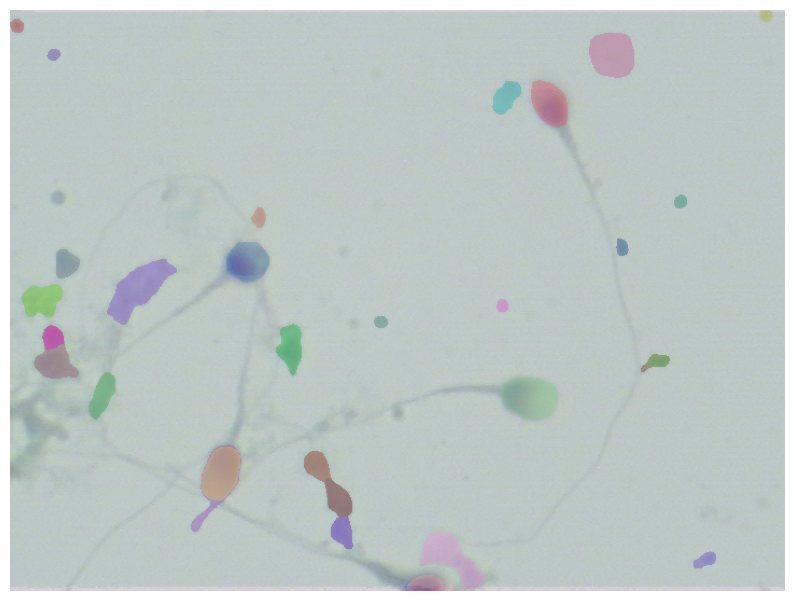

In [36]:
# 使用SAM进行预分割
mask_generator = SamAutomaticMaskGenerator(sam)
masks = mask_generator.generate(image)

# np.save('masks2.npy', masks)
plt.figure(figsize=(10,10))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show()

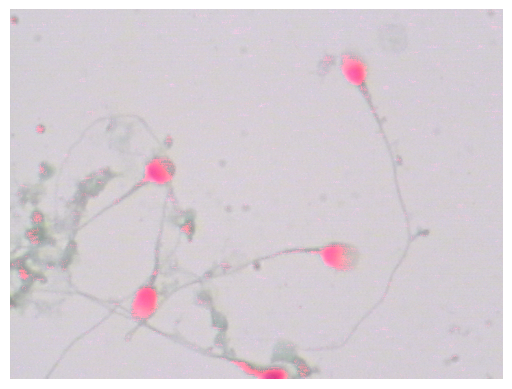

In [37]:
# 在原图中显示色彩识别结果
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图像
image = cv2.imread(f'image\\{i}.png')

# 将图像从BGR转换为HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# 定义你想要分割的颜色的HSV范围（紫色）
lower_color = np.array([100, 25, 20])  # 紫色的较低范围
upper_color = np.array([180, 255, 255])  # 紫色的较高范围

# 创建一个掩码，标记HSV图像中你想要分割的颜色范围的像素
mask = cv2.inRange(hsv, lower_color, upper_color)

# 使用掩码来仅显示你想要的颜色
segmented_image = cv2.bitwise_and(image, image, mask=mask)

# 创建一个彩色的覆盖层，将紫色区域设置为红色，并将其余区域设置为透明
overlay = np.zeros_like(image)  # 创建一个与原始图像具有相同尺寸和通道数的全零数组
overlay[mask != 0] = [0, 0, 255]  # 将覆盖层中的紫色区域设置为红色

# 将彩色覆盖层与原始图像合并
blended_image = cv2.addWeighted(image, 1, overlay, 0.5, 0)  # 调整权重以控制颜色强度

# 将BGR图像转换为RGB图像，以便正确显示
blended_image_rgb = cv2.cvtColor(blended_image, cv2.COLOR_BGR2RGB)

# 使用matplotlib显示结果
plt.imshow(blended_image_rgb)
plt.axis('off')  # 隐藏坐标轴
plt.show()


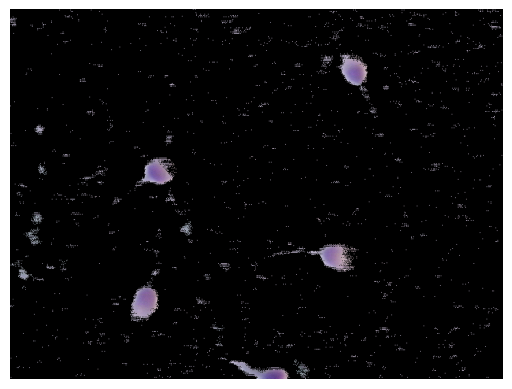

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图像
image = cv2.imread(f'image\\{i}.png')

# 将图像从BGR转换为HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# 定义分割的颜色的HSV范围（紫色）
lower_color = np.array([100, 25, 20])  # 紫色的较低范围
upper_color = np.array([180, 255, 255])  # 紫色的较高范围

# 创建一个掩码，标记HSV图像中像素
mask = cv2.inRange(hsv, lower_color, upper_color)

# 使用掩码来仅显示想要的颜色
segmented_image = cv2.bitwise_and(image, image, mask=mask)

# # 保存掩码到文件
# cv2.imwrite('mask.png', mask)
# # 或保存掩码到NumPy (.npy) 文件
# np.save('mask.npy', mask)

# 将BGR图像转换为RGB图像，以便正确显示
segmented_image_rgb = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB)

# 使用matplotlib显示结果
plt.imshow(segmented_image_rgb)
plt.axis('off')  # 隐藏坐标轴
plt.show()


In [39]:
# 将SAM识别结果掩码进行数字化处理，转存到mask1中
masks1 = [np.array(seg['segmentation'], dtype=np.uint8) for seg in masks]

masks1 = np.stack(masks1)

# 整理后SAM识别掩码结构，第一位是具体识别到元素的个数
masks1.shape

(31, 540, 720)

In [40]:
# 色彩分割掩码格式
mask.shape

(540, 720)

In [45]:
# 1.2 使用颜色范围进行识别并生成 mask
image_path = f'image\\{i}.png'  # 根据您的文件路径进行调整
image = cv2.imread(image_path)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower_color = np.array([100, 25 , 20])  # 紫色的较低范围
upper_color = np.array([180, 255, 255])  # 紫色的较高范围
mask = cv2.inRange(hsv, lower_color, upper_color)

filtered_masks = []

for current_mask in masks1:
    # Find the bounding box of the current mask
    rows, cols = np.where(current_mask == 1)
    min_row, max_row = np.min(rows), np.max(rows)
    min_col, max_col = np.min(cols), np.max(cols)
    
    region_mask = mask[min_row:max_row+1, min_col:max_col+1]
    region_current_mask = current_mask[min_row:max_row+1, min_col:max_col+1]
    
    overlap = np.sum((region_mask == 255) & (region_current_mask == 1))
    total_pixels = np.sum(region_current_mask == 1)
    overlap_percentage = (overlap / total_pixels) * 100
    
# 置信参数，建议范围为(50,80)，值越高筛选越严格，容易漏选
    if overlap_percentage > 60:
        filtered_masks.append(current_mask)

filtered_masks = np.array(filtered_masks)

# 筛选后的形状
filtered_masks.shape


(6, 540, 720)

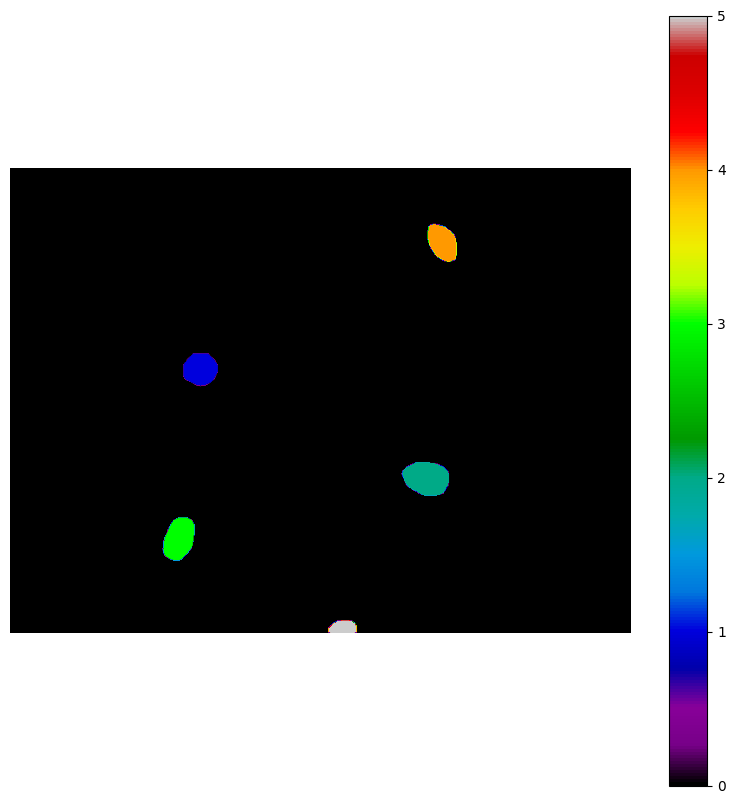

In [46]:
combined_masks_increment = np.zeros_like(filtered_masks[0], dtype=np.uint8)
counter = 1

for mask in filtered_masks:
    # Find the non-zero region of the current mask
    rows, cols = np.where(mask > 0)
    
    # If the region is empty, continue to the next mask
    if len(rows) == 0 or len(cols) == 0:
        continue
    
    # Extract the region from the combined mask for comparison
    min_row, max_row = np.min(rows), np.max(rows)
    min_col, max_col = np.min(cols), np.max(cols)
    region_combined = combined_masks_increment[min_row:max_row+1, min_col:max_col+1]
    region_current = mask[min_row:max_row+1, min_col:max_col+1]
    
    # Check if more than 10% of the region in the combined mask is non-zero
    if np.sum(region_combined > 0) / region_combined.size > 0.1:
        # If the current mask has fewer non-zero values in the region, skip it
        if np.sum(region_current) < np.sum(region_combined):
            continue

    # Increment the value of the current mask and add to the combined mask
    mask[mask > 0] = counter
    combined_masks_increment += mask
    counter += 1

# Visualizing the combined mask using the provided template
plt.figure(figsize=(10, 10))
plt.imshow(combined_masks_increment, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
plt.show()

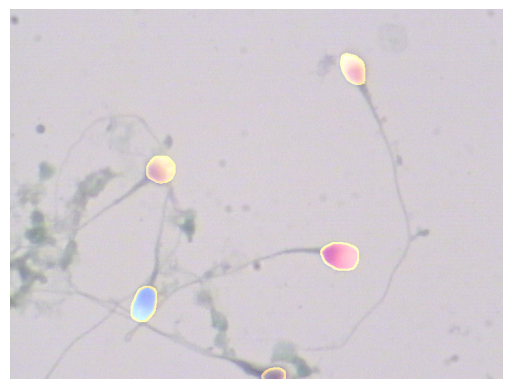

In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 从指定路径加载背景图片
background_image = cv2.imread(f'image\\{i}.png', cv2.IMREAD_COLOR)
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

# 获取 combined_masks_increment 中的所有类别标签
unique_labels = np.unique(combined_masks_increment)

# 创建一个颜色映射，为每个类别分配一个颜色（这里仅供示例，您可以根据需要更改）
color_map = {
    label: np.random.randint(0, 256, 3) for label in unique_labels if label != 0
}

# 为每个类别创建一个彩色覆盖层
overlay = np.zeros_like(background_image)
for label, color in color_map.items():
    mask = (combined_masks_increment == label)
    overlay[mask] = color

    # 为每个类别的边界添加浅蓝色边线
    edges = cv2.Canny(mask.astype(np.uint8) * 255, 100, 200)
    edges_dilated = cv2.dilate(edges, np.ones((3, 3), np.uint8), iterations=1)
    overlay[edges_dilated > 0] = [255, 191, 0]  # 外边框颜色

# 将彩色覆盖层与背景图片合并
blended_image = cv2.addWeighted(background_image, 1, overlay, 0.45, 0)

# 使用matplotlib显示结果
plt.imshow(blended_image)
plt.axis('off')  # 隐藏坐标轴
plt.show()

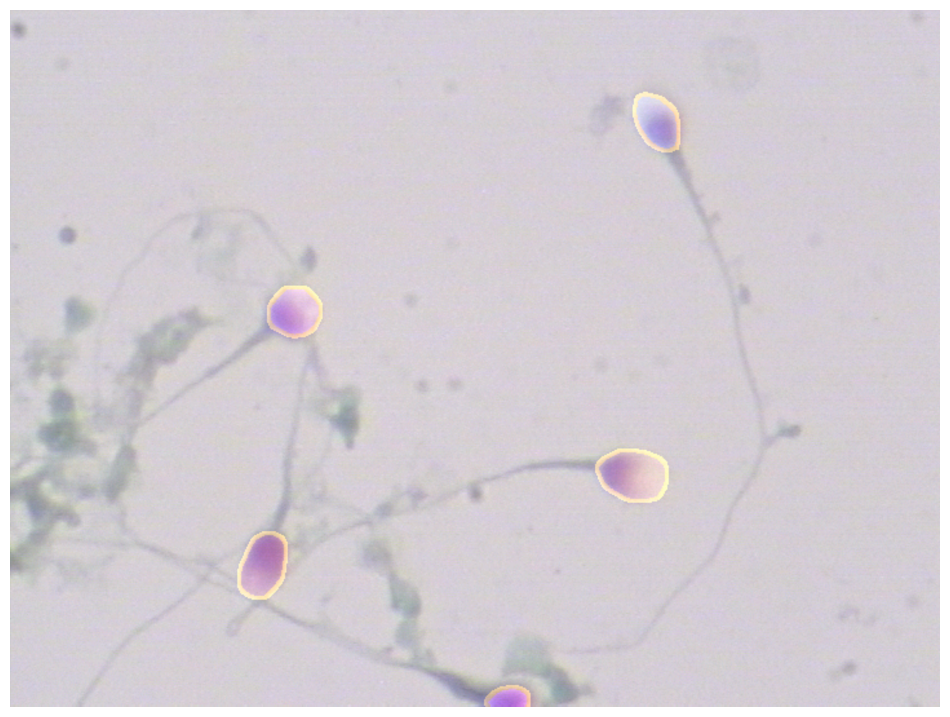

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 从指定路径加载背景图片
background_image = cv2.imread(f'image\\{i}.png', cv2.IMREAD_COLOR)
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

# 获取 combined_masks_increment 中的所有类别标签
unique_labels = np.unique(combined_masks_increment)

# 创建一个颜色映射，为每个类别分配一个颜色（这里仅供示例，您可以根据需要更改）
color_map = {
    label: np.random.randint(0, 256, 3) for label in unique_labels if label != 0
}

# 为每个类别创建一个彩色覆盖层
overlay = np.zeros_like(background_image)
for label, color in color_map.items():
    mask = (combined_masks_increment == label)
    overlay[mask] = color

    # 为每个类别的边界添加浅蓝色边线
    edges = cv2.Canny(mask.astype(np.uint8) * 255, 100, 200)
    edges_dilated = cv2.dilate(edges, np.ones((3, 3), np.uint8), iterations=1)
    overlay[edges_dilated > 0] = [255, 191, 0]  # 浅蓝色

# 将彩色覆盖层与背景图片合并
blended_image = cv2.addWeighted(background_image, 1, overlay, 0.3, 0)

# 将图像大小放大到原来的3倍
height, width, _ = blended_image.shape
enlarged_image = cv2.resize(blended_image, (width*3, height*3))

# 使用matplotlib在Jupyter notebook中展示放大后的图像
plt.figure(figsize=(12, 12))  # 设置图像展示的大小
plt.imshow(enlarged_image)
plt.axis('off')  # 隐藏坐标轴
plt.show()
